# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from datetime import date

analysis_date = date.today().strftime("%m/%d/%y")

# Import API key
from api_keys import weather_api_key
units = 'imperial'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Total Cities found: {len(cities)}')

Total Cities found: 640


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("""
Beginning Data Retrieval
-----------------------------
    """)
#set iterators for sets and records. there will be ten sets of fifty records to process.
s = 1
r = 0

#create lists for saving output
found_cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

#begin iterating through city list
for city in cities:

    
    # query api for city
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}'
    response_json = requests.get(url).json()
#     pp.pprint(response_json)
    raw_df = response_json
#     pp.pprint(raw_df)
    
    
    try:
        # save name, lat, long, max temp, humidity, cloudiness, wind speed, country, and date for each city
        
        lats.append(raw_df['coord']['lat'])
        lngs.append(raw_df['coord']['lon'])
        max_temps.append(raw_df['main']['temp_max'])        
        humidities.append(raw_df['main']['humidity'])
        cloudiness.append(raw_df['clouds']['all'])
        wind_speeds.append(raw_df['wind']['speed'])
        countries.append(raw_df['sys']['country'])
        dates.append(raw_df['dt'])
        found_cities.append(city)
        
        #check if 50 records have been processed and move to the next batch
        if (r + 1) == 51:
            r = 1
            s += 1
        else: 
            r += 1

        print(f'Processing Record {r} of Set {s} | {city}')
        
    except KeyError:
        
        print("City not found. Skipping...")     
        
print("""
-----------------------------
Data Retrieval Complete
-----------------------------
    """)


Beginning Data Retrieval
-----------------------------
    
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | seddon
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | khani
Processing Record 10 of Set 1 | seydi
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | whitianga
Processing Record 15 of Set 1 | marienburg
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | teknaf
Processing Record 21 of Set 1 | road town
Processing Record 22 of Set 1 | marivan
Processing Record 23 of Set 1 | lagoa
P

Processing Record 39 of Set 4 | jalu
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | puerto leguizamo
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | winton
Processing Record 44 of Set 4 | havre-saint-pierre
Processing Record 45 of Set 4 | taltal
City not found. Skipping...
Processing Record 46 of Set 4 | port hardy
Processing Record 47 of Set 4 | altoona
Processing Record 48 of Set 4 | camabatela
Processing Record 49 of Set 4 | lhokseumawe
Processing Record 50 of Set 4 | kattivakkam
Processing Record 1 of Set 5 | shakiso
City not found. Skipping...
Processing Record 2 of Set 5 | srednekolymsk
Processing Record 3 of Set 5 | bimbo
Processing Record 4 of Set 5 | cockburn town
Processing Record 5 of Set 5 | oranjemund
Processing Record 6 of Set 5 | uglovskoye
Processing Record 7 of Set 5 | inirida
Processing Record 8 of Set 5 | ardakan
Processing Record 9 of Set 5 | sumenep
Processing Record 10 of Set 5 | klaksvik
Processing R

Processing Record 33 of Set 8 | vilhena
Processing Record 34 of Set 8 | bam
Processing Record 35 of Set 8 | neftekamsk
City not found. Skipping...
Processing Record 36 of Set 8 | kavieng
Processing Record 37 of Set 8 | lac du bonnet
Processing Record 38 of Set 8 | sao joao da barra
Processing Record 39 of Set 8 | san patricio
Processing Record 40 of Set 8 | tsumeb
Processing Record 41 of Set 8 | nurota
Processing Record 42 of Set 8 | mocuba
Processing Record 43 of Set 8 | whithorn
Processing Record 44 of Set 8 | ulcinj
Processing Record 45 of Set 8 | bairiki
Processing Record 46 of Set 8 | ahipara
Processing Record 47 of Set 8 | sal rei
Processing Record 48 of Set 8 | sambava
City not found. Skipping...
Processing Record 49 of Set 8 | sri aman
Processing Record 50 of Set 8 | ballina
Processing Record 1 of Set 9 | grandview
Processing Record 2 of Set 9 | villefontaine
Processing Record 3 of Set 9 | shakhtinsk
Processing Record 4 of Set 9 | kavaratti
Processing Record 5 of Set 9 | talnak

Processing Record 23 of Set 12 | syracuse
Processing Record 24 of Set 12 | rio gallegos
Processing Record 25 of Set 12 | maniitsoq
Processing Record 26 of Set 12 | port augusta
Processing Record 27 of Set 12 | kozhva
Processing Record 28 of Set 12 | markivka
Processing Record 29 of Set 12 | gejiu
Processing Record 30 of Set 12 | raudeberg
Processing Record 31 of Set 12 | kurilsk
Processing Record 32 of Set 12 | alyangula
Processing Record 33 of Set 12 | xinyu
Processing Record 34 of Set 12 | barreirinhas
Processing Record 35 of Set 12 | myre
Processing Record 36 of Set 12 | riberalta
Processing Record 37 of Set 12 | formosa
Processing Record 38 of Set 12 | aksay
Processing Record 39 of Set 12 | machachi
Processing Record 40 of Set 12 | guaymas
Processing Record 41 of Set 12 | kapit
Processing Record 42 of Set 12 | huatulco
Processing Record 43 of Set 12 | mayor pablo lagerenza
Processing Record 44 of Set 12 | ellensburg
Processing Record 45 of Set 12 | barra do garcas
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#check lengths of arrays
print(f'''
cities: {len(cities)}
found_cities: {len(found_cities)}
lats: {len(lats)}
longs: {len(lngs)}
temps: {len(max_temps)}
humidities: {len(humidities)}
clouds: {len(cloudiness)}
speeds: {len(wind_speeds)}
countries: {len(countries)}
dates: {len(dates)}
''')

#prepare dict for dataframe from lists created with api
prep_df = {
    'City':found_cities,
    'Lat':lats,
    'Lng':lngs,
    'Max Temp':max_temps,
    'Humidity':humidities,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speeds, 
    'Country':countries,
    'Date':dates
}

#create dataframe
city_data = pd.DataFrame(prep_df)

#export to csv
city_data.to_csv(output_data_file, index_label='City ID')
city_data.head()


cities: 640
found_cities: 599
lats: 599
longs: 599
temps: 599
humidities: 599
clouds: 599
speeds: 599
countries: 599
dates: 599



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,68.54,92,100,10.67,UY,1613026227
1,ushuaia,-54.8000,-68.3000,60.80,67,0,14.97,AR,1613026376
2,seddon,-37.8068,144.8916,91.99,27,100,18.41,AU,1613026439
3,hobart,-42.8794,147.3294,75.00,40,0,8.05,AU,1613026256
4,busselton,-33.6500,115.3333,70.00,61,1,1.99,AU,1613026376


In [5]:
### change this later so it uses the data created from the api.

# city_csv = output_data_file
# city_data = pd.read_csv(city_csv)
# city_data.head()

# describe city_data
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.00000,599.000000,5.990000e+02
mean,19.864681,19.021243,51.345209,71.315526,52.00000,8.091369,1.613027e+09
std,32.577710,88.861667,32.739050,21.018759,41.36844,6.396944,1.437105e+02
min,-54.800000,-179.166700,-43.600000,12.000000,0.00000,0.250000,1.613026e+09
25%,-7.324900,-57.655150,28.165000,60.500000,1.00000,3.440000,1.613026e+09
50%,22.239400,25.133300,64.400000,76.000000,62.00000,6.600000,1.613027e+09
75%,46.898250,91.906100,77.000000,87.000000,96.50000,10.415000,1.613027e+09
max,78.218600,176.633300,98.600000,100.000000,100.00000,42.570000,1.613027e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

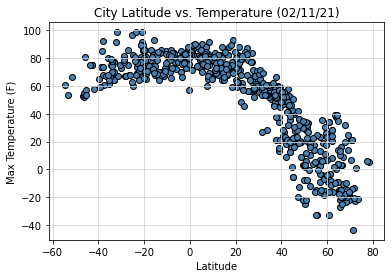

Put in sentences that describe what is being analyzed


In [8]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Max Temp"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("images/Latitude_v_Temperature.png")
plt.show()


# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Latitude vs. Humidity Plot

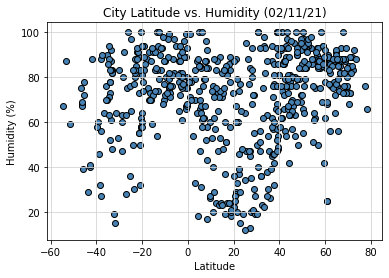

Put in sentences that describe what is being analyzed


In [9]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("images/Latitude_v_Humidity.png")
plt.show()


# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Latitude vs. Cloudiness Plot

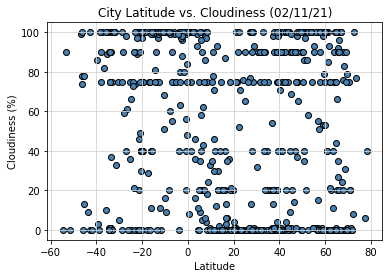

Put in sentences that describe what is being analyzed


In [10]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("images/Latitude_v_Cloudiness.png")
plt.show()


# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Latitude vs. Wind Speed Plot

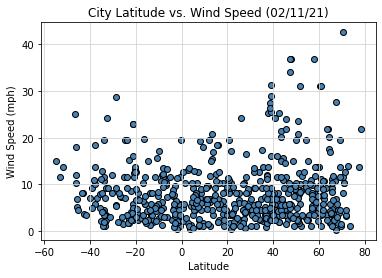

Put in sentences that describe what is being analyzed


In [11]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("images/Latitude_v_WindSpeed.png")
plt.show()


# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Linear Regression

In [12]:
#get data for each hemisphere
north = city_data.loc[city_data['Lat']>=0, :]
# north.describe()

south = city_data.loc[city_data['Lat']<0, :]
# south.describe()

### Max Temp vs. Latitude by Hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-vlaue is: -0.8853986132960213


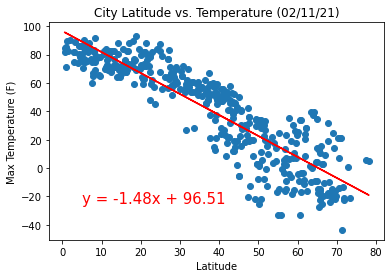

In [13]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Max Temp"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-25),fontsize=15,color="red")
plt.savefig("images/North_Latitude_v_Temperature_LineRegress.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-vlaue is: 0.41160761096886433


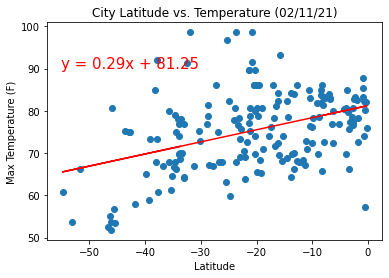

In [14]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Max Temp"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.savefig("images/South_Latitude_v_Temperature_LineRegress.png")
plt.show()


<span style = "color:red"> *Description of what is being modeled in the plots above* </span>

### Humidity (%) vs. Latitude by Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-vlaue is: 0.37135729350695873


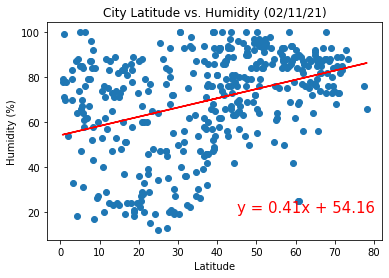

In [15]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Humidity"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.savefig("images/North_Latitude_v_Humidity_LineRegress.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-vlaue is: 0.3558301884805378


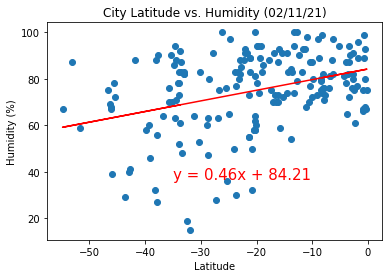

In [16]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Humidity"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,37),fontsize=15,color="red")
plt.savefig("images/South_Latitude_v_Humidity_LineRegress.png")
plt.show()


<span style = "color:red"> *Description of what is being modeled in the plots above* </span>

### Cloudiness (%) vs. Latitude by Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-vlaue is: 0.12172151607156019


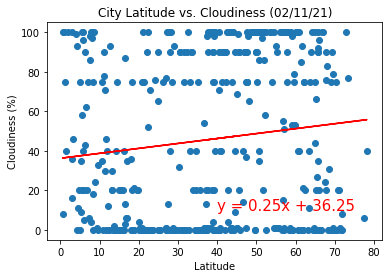

In [17]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.savefig("images/North_Latitude_v_Cloudiness_LineRegress.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-vlaue is: 0.2731821171066877


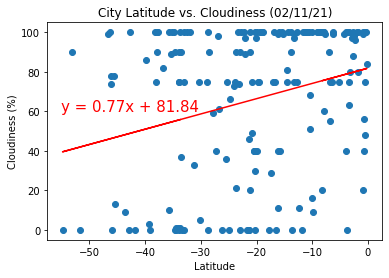

In [18]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.savefig("images/South_Latitude_v_Cloudiness_LineRegress.png")
plt.show()


<span style = "color:red"> *Description of what is being modeled in the plots above* </span>

### Wind Speed (mph) vs. Latitude by Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-vlaue is: 0.1299145824021975


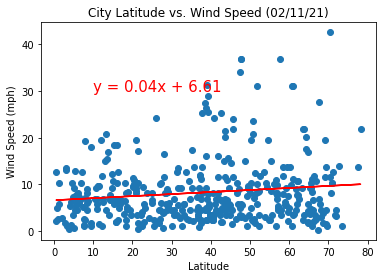

In [19]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("images/North_Latitude_v_WindSpeed_LineRegress.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-vlaue is: -0.1932872381211324


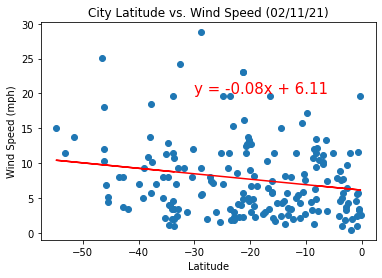

In [20]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.savefig("images/South_Latitude_v_WindSpeed_LineRegress.png")
plt.show()


<span style = "color:red"> *Description of what is being modeled in the plots above* </span>